# Exploring My Coffee Habits

<h3><i> An Exploratory Analysis by Stephen C. Brown<i/></h3>

This analysis was done in order to show a few of the basic skills learned in pursuit of my IBM Data Science Professional Certification. https://www.coursera.org/account/accomplishments/specialization/certificate/PAM9R7LP4X4A

Data is from Mint and has been prescrubbed to only show my coffee related transactions

Note that the scope of the data is from 6/1/18 until 2/1/19


### Step 1: Import and Stage Data

In [10]:
#import in required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta as td

In [11]:
data=pd.read_csv('transactions.csv') #reading in my transaction data

In [12]:
data.shape

(1842, 7)

In [13]:
data['Date'] = data['Date'].apply(lambda x: pd.to_datetime(x)) #converting date field to date-type
data['Date'].head(2)

0   2015-06-25
1   2015-07-18
Name: Date, dtype: datetime64[ns]

In [14]:
data.head(1)

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name
0,2015-06-25,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,2.01,debit,Coffee Shops,50 Platinum Visa


In [15]:
iscoffee=data['Category'] =='Coffee Shops'
coffee = data[iscoffee].copy(deep =True) #filters out any non-coffee transactions
startdate= pd.to_datetime('6/1/2018') #day I moved to Chicago 
datefilter=coffee['Date'] >= startdate 
coffee = coffee[datefilter].copy(deep =True)
coffee.drop(['Transaction Type','Category'],axis =1, inplace =True)

print('Shape of Coffee DataFrame',coffee.shape)


Shape of Coffee DataFrame (116, 5)


In [16]:
timedelta = pd.to_datetime(startdate) - pd.to_datetime('2/1/2019') #date when data pulled
numweeks =timedelta.days/-7 #weeks turn days into weeks
numweeks

35.0

In [17]:
lst_weekday=[] #Assigning the weekday Values to the dataframe

for t in coffee['Date']:
    day =pd.to_datetime(t).day_name()
    lst_weekday.append(day)
coffee['Weekday'] = lst_weekday
coffee.head(2)

,Date,Description,Original Description,Amount,Account Name,Weekday
131,2018-06-03,Starbucks,STARBUCKS STORE 02483 CHICAGO IL 0071QH2O2RRE7...,4.96,Discover it Card,Sunday
132,2018-06-07,Starbucks,STARBUCKS STORE 02483 CHICAGO IL 0071QH2OGDMF7...,4.96,Discover it Card,Thursday


In [18]:
weeknum =[] #adding weeknumber to dataframe

for i in coffee.index:
    tuple =coffee.loc[i]['Date'].isocalendar()
    weeknum.append(tuple[1])

coffee['Weeknum']=weeknum
coffee.head()


,Date,Description,Original Description,Amount,Account Name,Weekday,Weeknum
131,2018-06-03,Starbucks,STARBUCKS STORE 02483 CHICAGO IL 0071QH2O2RRE7...,4.96,Discover it Card,Sunday,22
132,2018-06-07,Starbucks,STARBUCKS STORE 02483 CHICAGO IL 0071QH2OGDMF7...,4.96,Discover it Card,Thursday,23
133,2018-06-10,Starbucks,STARBUCKS STORE 11517 EAST LANSING MI 010NETSQ...,12.77,Discover it Card,Sunday,23
134,2018-06-11,Dunkin Donuts,DUNKIN #353478 Q35 CHICAGO IL SAMSUNG PAY ENDI...,1.22,Discover it Card,Monday,24
135,2018-06-16,Starbucks,STARBUCKS STORE 02483 CHICAGO IL 0071QI0J055A6...,9.92,Discover it Card,Saturday,24


### Step 2: Summarizing

In [19]:
print('Coffee Transactions\n',coffee['Amount'].describe())

print('\n\n')
print('Coffee Weekly Transactions\n', coffee.groupby('Weeknum').sum().describe())
print('\n\nCoffee Weekdays Transactions(Mon-Sun)\n',coffee[['Weekday','Amount']].groupby('Weekday').sum().describe())

Coffee Transactions
 count    116.000000
mean       9.890517
std        6.161883
min        0.150000
25%        4.960000
50%       10.000000
75%       13.105000
max       25.000000
Name: Amount, dtype: float64



Coffee Weekly Transactions
           Amount
count  36.000000
mean   31.869444
std    16.271539
min     3.100000
25%    18.527500
50%    29.535000
75%    44.115000
max    67.550000


Coffee Weekdays Transactions(Mon-Sun)
           Amount
count    7.00000
mean   163.90000
std     86.82424
min     65.65000
25%    112.67500
50%    152.60000
75%    185.17500
max    333.35000


These data gives us some basic idea, but it is still hard to parse out. I can see that I normally spend about 10$ a transaction (Most likely when my significant other and I go together) and I can also see that the standard deviation seems quite high. I imagine that there's some trends hiding in the data.

### Step 3: Analysis

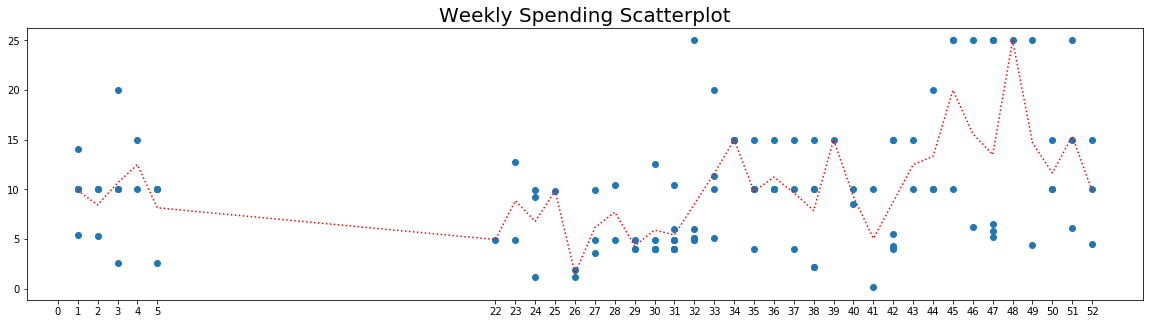

In [38]:
order = []
for i in range(22,53):     #reordering index
    order.append(i)
for i in range(0,6):
    order.append(i)
strord=str(order)
x = coffee.Weeknum
y =coffee.Amount
weekly =coffee.groupby('Weeknum').mean()
weekly.reindex(order)

plt.figure(figsize=(20,5))
plt.scatter(x,y)
plt.xticks(order,(order))
plt.title('Weekly Spending Scatterplot', size=20)
plt.plot(weekly.index,weekly.Amount,color ='red', ls=':')
plt.show()

This scatterplot implies that my spending has increased from the first few weeks I moved to chicago but it is rather noisy. Lets look into the weekly data and see if I can gather any trends there.

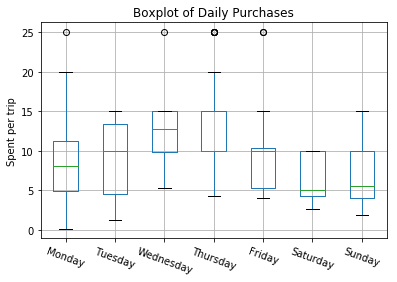

In [41]:
M_D = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

ax =coffee[['Weekday','Amount']].boxplot(by='Weekday')    #grouping Boxplot by weekday
ax.set_xticklabels(M_D,rotation=-20)
plt.suptitle('')
ax.set_title('Boxplot of Daily Purchases')
ax.set_ylabel('Spent per trip')
ax.set_xlabel('',rotation =90)
ax.set_label('Amount Spent')


This boxplot shows the spread of each days data. It appears that I am less decisive on Tuesdays for whether or not I'll be buying coffee. The averages tend around $5, my go to drink is a Starbucks Mocha clocking in at 4.96 so that makes sense. 

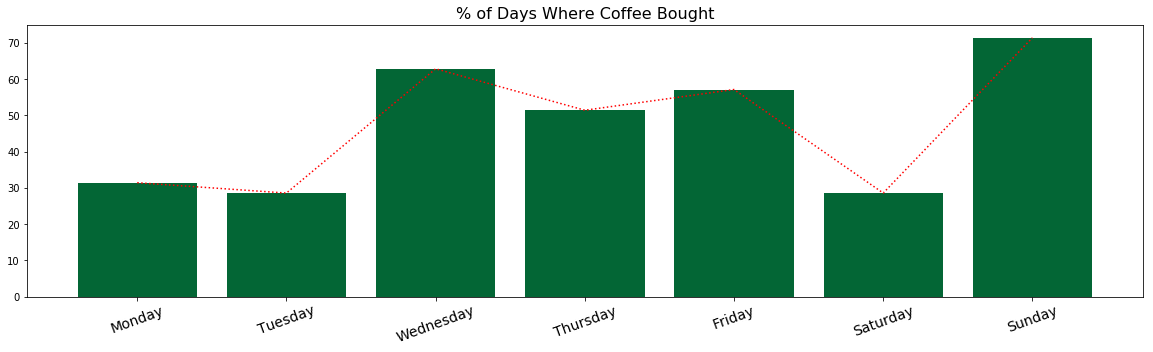

In [42]:
countCoffee =coffee.groupby(['Weekday']).count()
countCoffee = countCoffee
M_D = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
new_index= M_D
countCoffee =countCoffee.reindex(new_index)

x= countCoffee.index
y=countCoffee.Amount/numweeks *100  #raw count is divided by number of weeks to give a percentage of days 
                                    #where coffee was purchased

plt.figure(figsize=(20,5))
plt.bar(x,y,color ='#036635')
plt.plot(x,y, color ='red',linestyle=':')
plt.xlabel('')
plt.xticks(rotation=20, size=14)
plt.ylabel('')
plt.title('% of Days Where Coffee Bought',size=16)
plt.show()

This graph shows decisively that Sundays are coffee days for me, with me choosing to buy a coffee nearly 70% of the previous 35 sundays. 

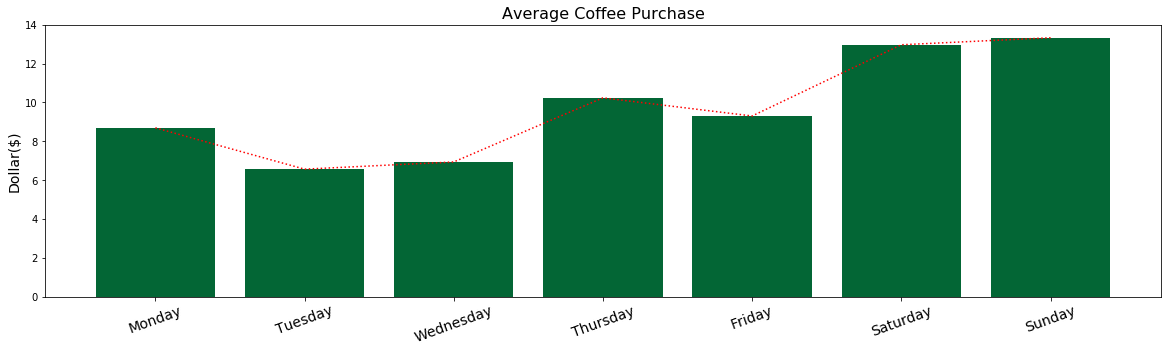

In [43]:
meanCoffee =coffee.groupby(['Weekday']).mean()
meanCoffee
new_index= M_D
meanCoffee =meanCoffee.reindex(new_index)

x= meanCoffee.index
y= meanCoffee.Amount

plt.figure(figsize=(20,5))
plt.bar(x,y,color ='#036635')
plt.plot(x,y, color ='red',linestyle=':')
plt.xlabel('')
plt.xticks(rotation=20, size=14)
plt.ylabel('Dollar($)', size =14)
plt.title('Average Coffee Purchase',size=16)
plt.show()

This graph points to what days I'm buying for myself or sharing with a friend. It appears that Tuesday and Wednesday are my solitary coffee days whereas I often spend Saturday and Sunday at the cafe with a loved one. 

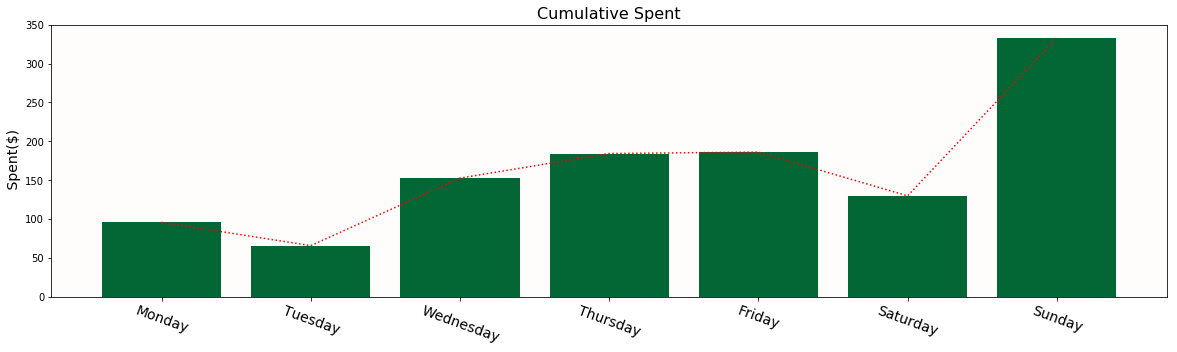

In [97]:
sumCoffee =coffee.groupby(['Weekday']).sum()
sumCoffee
new_index= M_D
sumCoffee =sumCoffee.reindex(new_index)

x= sumCoffee.index
y= sumCoffee.Amount

plt.rcParams['axes.facecolor'] = '#fffcfc'
plt.figure(figsize=(20,5))
plt.bar(x,y,color='#036635')
plt.plot(x,y, color ='red', linestyle=':')
plt.xlabel('')
plt.xticks(rotation=-20, size=14)
plt.ylabel(' Spent($)', size=14)
plt.title('Cumulative Spent',size=16)
plt.show()

This graph emphasizes what was shown in previous and adds nuance. While I may share saturday with a companion I'm vastly more likly to go and buy coffee on Sunday leading it to be my most expensive day of the week in the last 6 months.

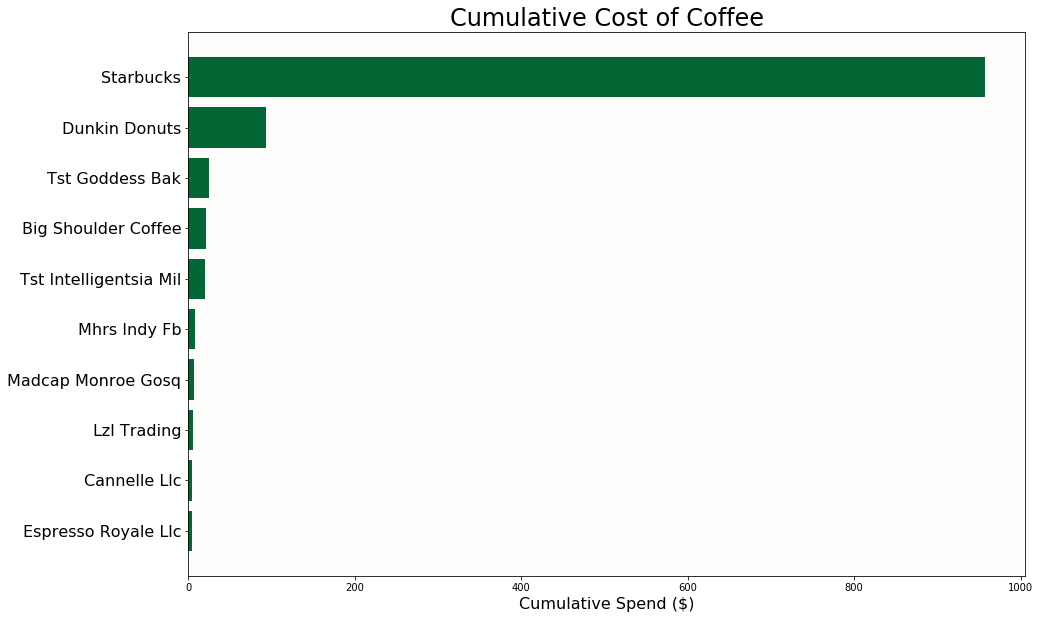

In [128]:
stores = coffee.groupby('Description').sum()
stores.sort_values(by = 'Amount', inplace=True)
x = stores.index
y= stores.Amount

plt.figure(figsize=(15,10))

plt.xlabel('Cumulative Spend ($)', size=16)
plt.barh(x,y,color='#036635')
plt.yticks(size=16)
plt.title("Cumulative Cost of Coffee", size=24)
plt.show()

## Step 5: Conclusion

I buy too much coffee. 

Every week, I spend an average of $163 on coffee with most of that happening on Sundays. The next most indulgent day is Wednesday, but most of that happens in solitute. This analysis also confirms my suspicion that I am an intense creature of habit. The  majority of these transactions were for my 4.96 Starbucks obsession. I ought to try to find a new way to stay awake at work. 

